In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import envs
import agents
import discrete
import continuous
import plotting

%matplotlib inline

## Loading data

In [ ]:
# Historical data can be downloaded from https://www.investing.com/currencies/usd-jpy-historical-data
prices = pd.read_csv('./data/USD_JPY.csv').Price
currency_config = envs.USDJPYConfig()
print(prices.shape)
prices.head()

(4999,)


0    120.23
1    120.38
2    120.27
3    119.93
4    120.03
Name: Price, dtype: float64

In [ ]:
train_prices = prices[:2000].values
test_prices = prices[2000:].values

## Discretized price space

### Training

Episode 20/20.

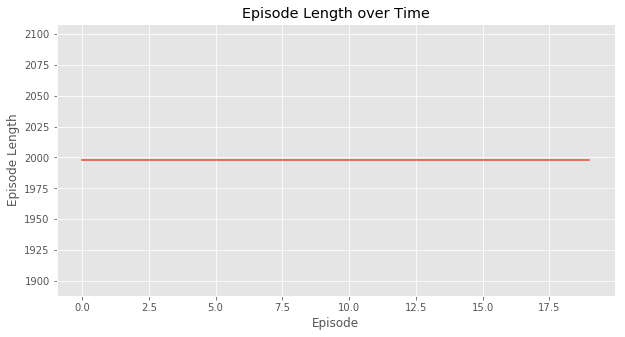

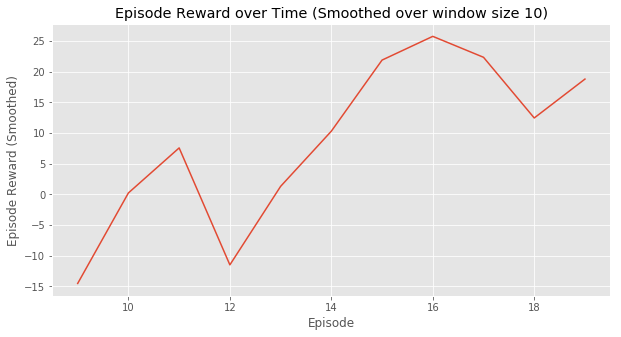

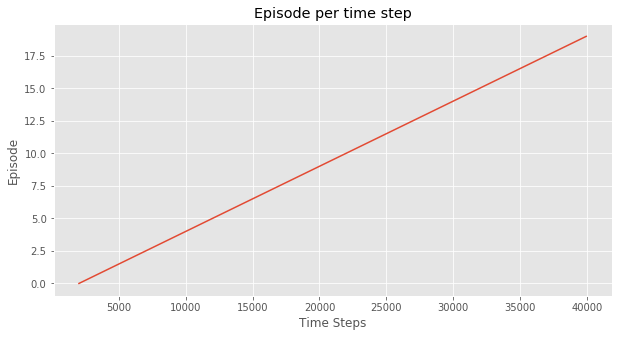

In [ ]:
env = envs.TwoAssetsDiscreteEnv(train_prices, currency_config)
Q, stats, rewards = discrete.q_learning(env, 20, debug_every=10)
plotting.plot_episode_stats(stats)
plt.show()

### Test

Episode 1/1.[65.59648465]


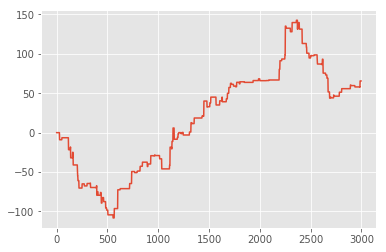

In [ ]:
env.reset_prices(test_prices)
env.reset()
Q, stats, rewards = discrete.q_learning(env, 1, debug_every=1)
print(stats.episode_rewards)
plt.plot(np.array(rewards).cumsum())
plt.show()

## Continuous price space

### Training

In [ ]:
env = envs.TwoAssetsContinuousEnv(train_prices, currency_config)
agent = agents.Agent(env)
_ = continuous.q_learning(env, agent)

### Test

In [ ]:
env.reset_prices(test_prices)
env.reset()
log = continuous.q_learning(env, agent)

In [ ]:
prices, capital, _ = list(zip(*log.states))
plt.figure(figsize=(12,18))
plt.subplot(311)
plt.plot(prices)
plt.subplot(312)
plt.plot(np.array(log.rewards).cumsum())
plt.subplot(313)
plt.plot(log.actions)
plt.show()